## Regression assignment

In [3]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os.path

# to make this notebook's output stable across runs
rnd.seed(4)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    image_dir = os.path.join(PROJECT_ROOT_DIR, "images")
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    path = os.path.join(image_dir, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Loading the data 

This is Kaggle data on California housing which has been copied to my website to evade updates.

In [4]:
import pandas as pd
HOUSING_PATH = "http://gawron.sdsu.edu/housing.csv"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = housing_path#os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
df = load_housing_data()
#  We need no NaNs for what follows.  This is 
#  a big hammer, but put probably ok for what we're doing
df.fillna(0)
print(df.shape)
df

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [379]:
import numpy as np
from sklearn.preprocessing import scale

X,Y = df.median_income.values, df.median_house_value.values
Z = np.vstack([X,Y]).T
print("Med. Inc.|Med. Hou. |Z shape | Samp. Inc. | Samp. Hou.| Samp. Z")
print(X.shape,Y.shape,Z.shape,X[0],Y[0],Z[0])
#plt.scatter(X,Y)

Med. Inc.|Med. Hou. |Z shape | Samp. Inc. | Samp. Hou.| Samp. Z
(20640,) (20640,) (20640, 2) 8.3252 452600.0 [8.3252e+00 4.5260e+05]


What would happend if we centered and scaled data.  

May not be useful for every problem.

In [185]:
Z_scale = scale(Z,axis=0)
#print(Z_scale.shape)
print("         Med. inc. Med. hou.             STD inc. STD hou. ")
print(f" Data Mn:   {Z[:,0].mean():0.2f}   {Z[:1].mean():,.0f}"
      f"        Data STD: {Z[:,0].std():0.2f}  {Z[:1].std():,.0f}\n"
      f" Scaled Mn: {Z_scale[:,0].mean(): 0.1f}  {Z_scale[:,1].mean(): 0.1f}"
      f"          Scaled STD: {Z_scale[:,0].std():0.2f}   {Z_scale[:1].std():0.2f}\n")

         Med. inc. Med. hou.             STD inc. STD hou. 
 Data Mn:   3.87   226,304        Data STD: 1.90  226,296
 Scaled Mn:  0.0  -0.0          Scaled STD: 1.00   0.11



#### Example:  Plot total_bedrooms versus households.

Adding a log values column should be down before copies are made bysome of the otehr operations below

In [6]:
df['log_median_income'] = np.log(df['median_income'])
by_households = df.sort_values(by=['households'])

<AxesSubplot:xlabel='households'>

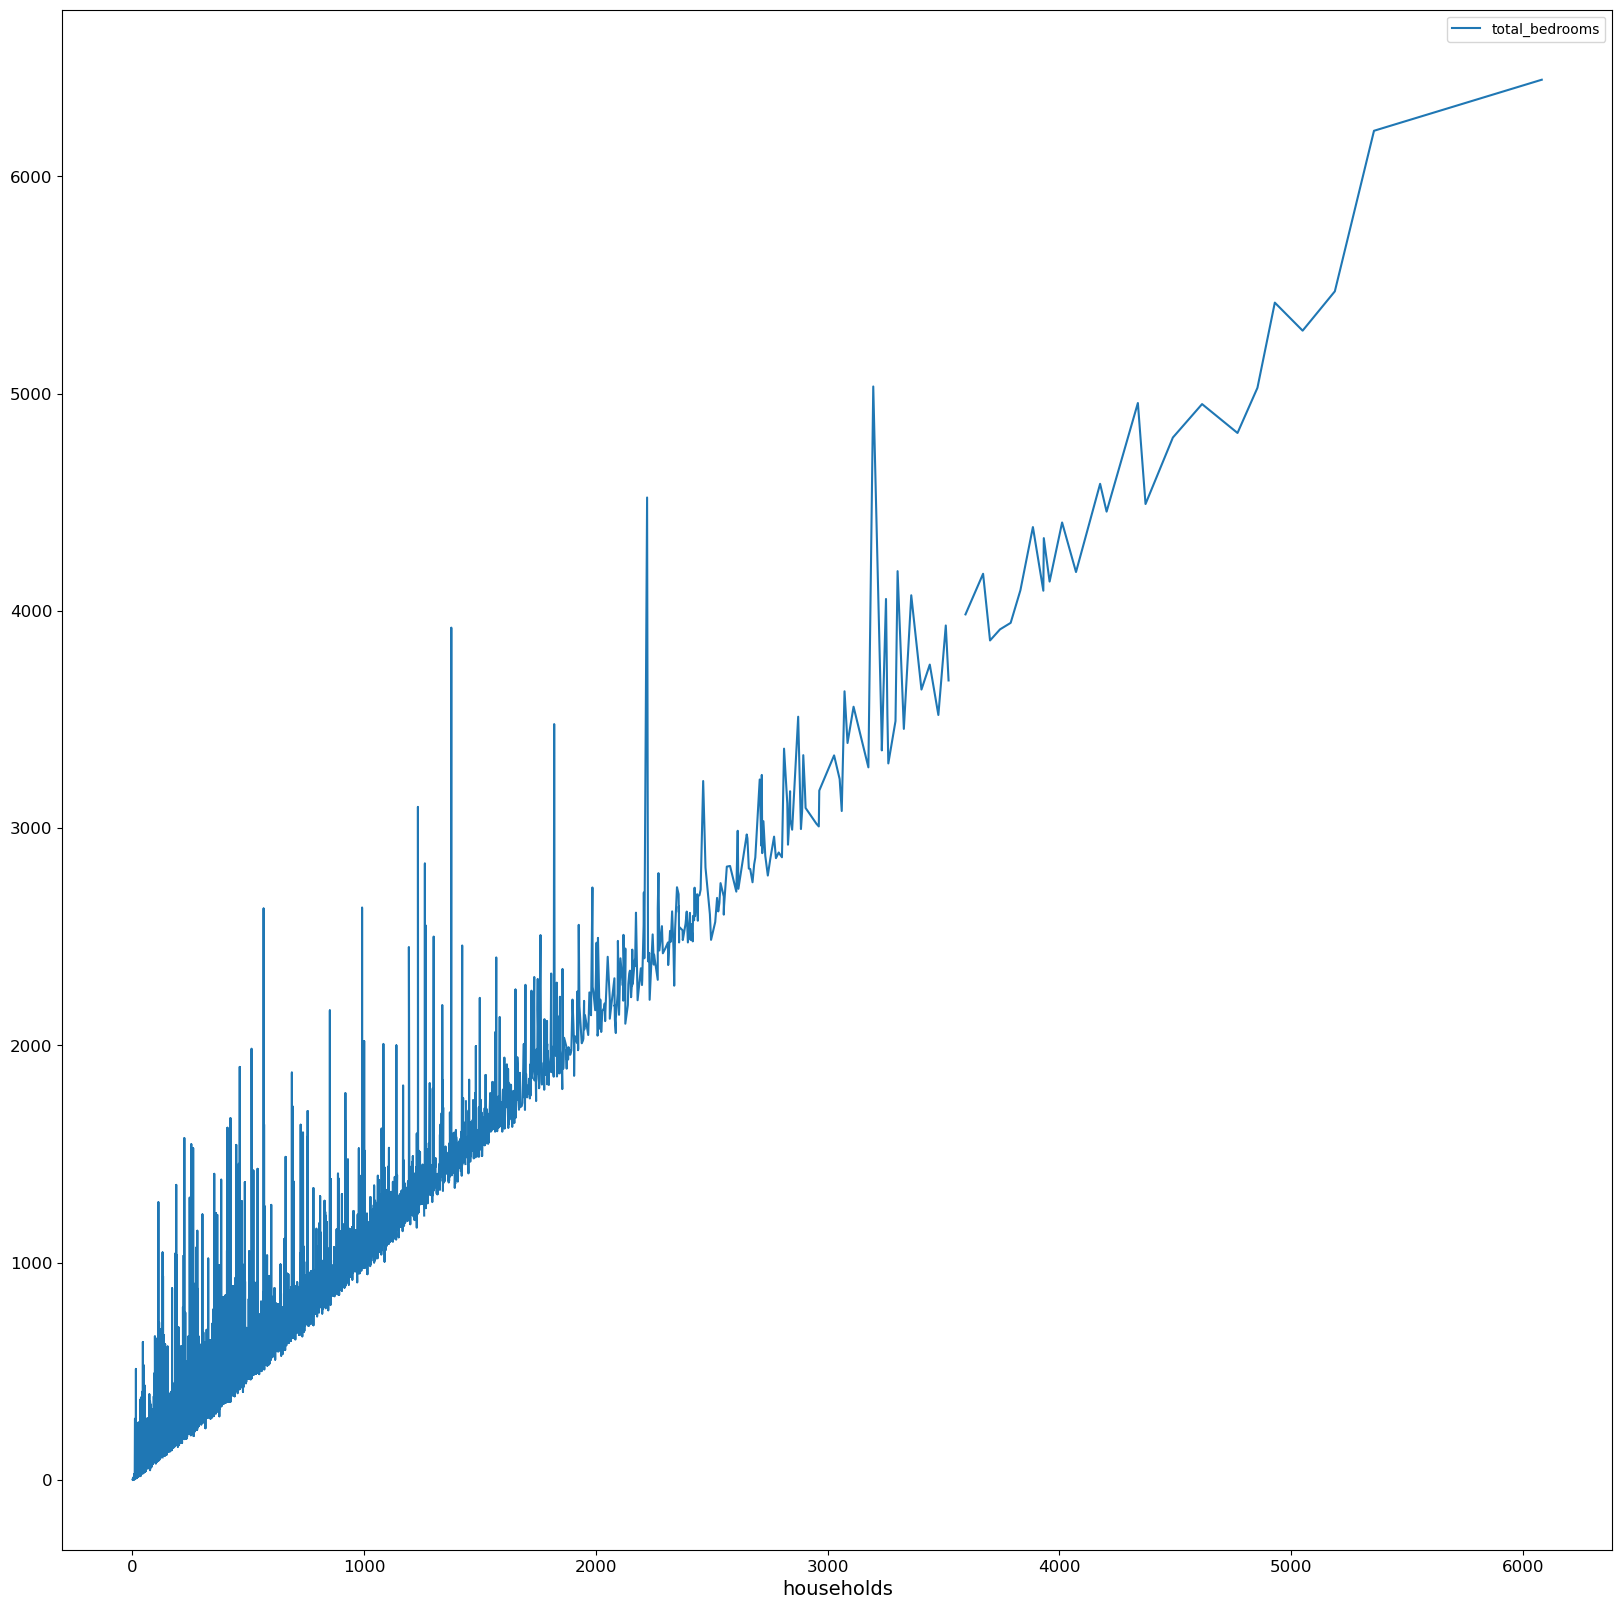

In [381]:
by_households.plot(x='households',y='total_bedrooms',figsize=(20,20))

Doesn't really make sense to draw a **line** here visually.  Increasing number
of households **generally** increases number of bedrooms, but a small increase
in one does not with perfect reliability predict a small increase in the other.
Hence the zigzagging.

Also, for similar reasons, possibly not a function.  Two different
communities **might** have exactly the same number of hoiuseholds,
bit not exactly the same number of total bedrooms.

Let's do some binning: we'll round off to the nearest 50 and take the mean number
of bedrooms for each bin.

In [7]:
import pandas as pd

# Bins: households rounded off to the nearest 50
by_households['Households Level'] = \
         by_households['households'].apply(lambda x: 50 * (x // 50))
bh_pivot = pd.pivot_table(by_households, 
                    values='total_bedrooms',
                    index= 'Households Level',
                    aggfunc=np.mean)
bh_pivot

,total_bedrooms
Households Level,
0.0,46.720365
50.0,97.358314
100.0,161.683043
150.0,199.337266
200.0,245.075658
...,...
4900.0,5419.000000
5050.0,5290.000000
5150.0,5471.000000


The newly created pivot table now produces a plot that tells the story:  Exception  for a few bins in the middle range of households, the average number of bedrooms in this data set is very close to 1.  (The line we're plotting is y=x).

Text(0, 0.5, 'Bedrooms')

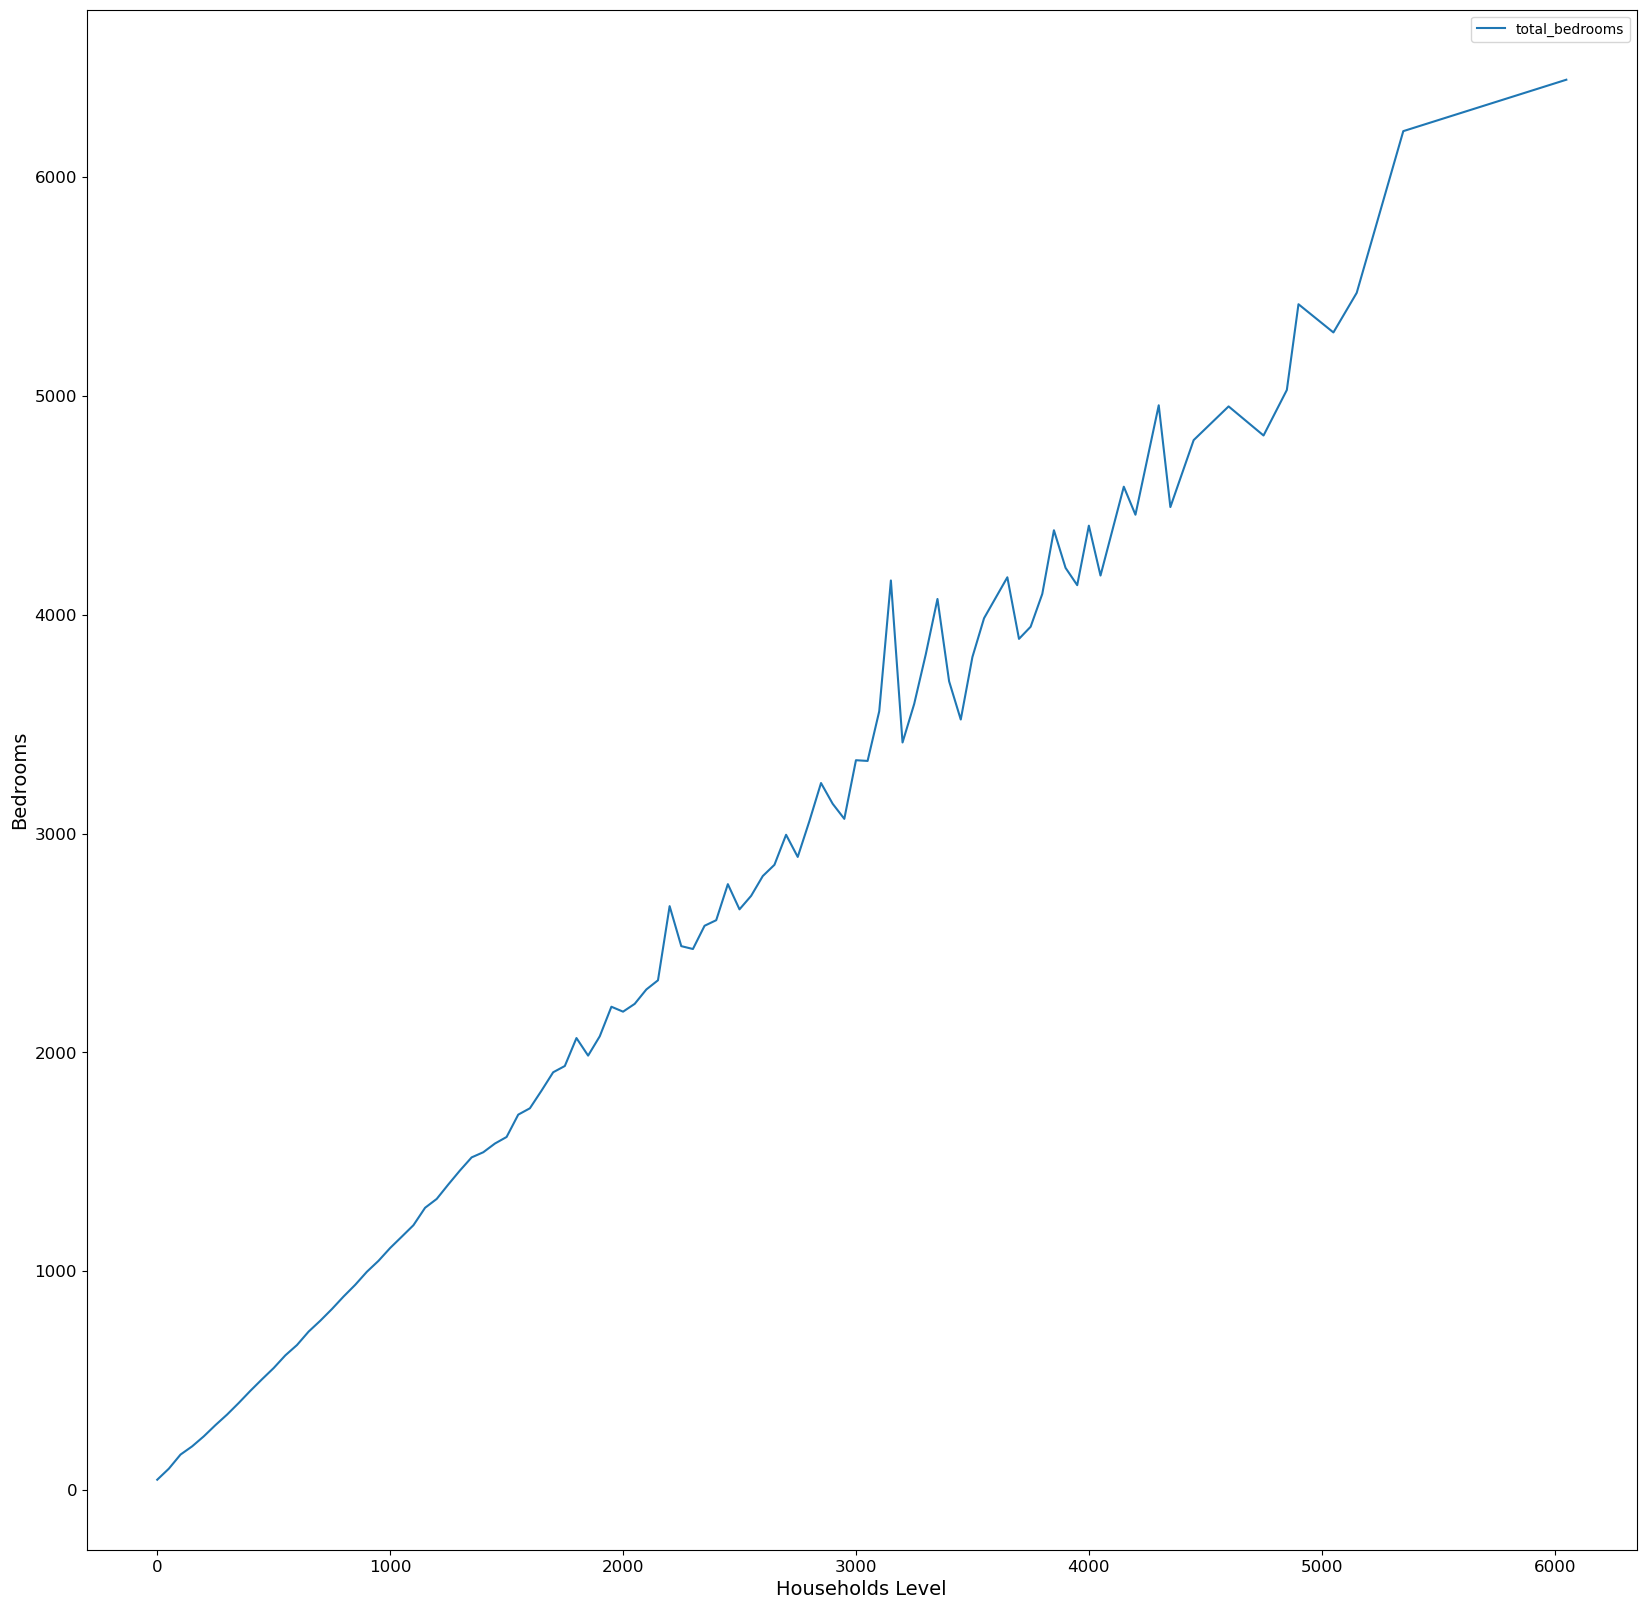

In [383]:
#plt.plot(Z_scale[:,0],Z_scale[:,1])
#bh_pivot.plot(x='households_level',y='index')
fig, ax = plt.subplots(1,1)
bh_pivot.plot(figsize=(20,20),ax=ax)
plt.ylabel('Bedrooms')

## The Regression Problem

We'll use this form of the data, introduced in the assignment NB. It has a new column called Households level.

In [8]:
by_households

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_median_income,Households Level
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY,2.708057,0.0
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND,0.485508,0.0
2511,-119.54,36.51,36.0,49.0,7.0,28.0,2.0,4.6250,162500.0,INLAND,1.531476,0.0
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND,0.864997,0.0
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0,NEAR OCEAN,1.618992,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8985,-118.44,33.98,21.0,18132.0,5419.0,7431.0,4930.0,5.3359,500001.0,<1H OCEAN,1.674458,4900.0
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN,1.794938,5050.0
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN,2.014196,5150.0
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND,1.599711,5350.0


The model in the assignment,

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


bh = by_households
# Get rid of house values of 500_000 or over
sensible_df = bh[bh.median_house_value < 500_000]
X,y = sensible_df[["median_income"]],sensible_df["median_house_value"]
income_train, income_test, y_train,y_test = train_test_split(X,
                                                             y,
                                                            random_state=46)
#Xsample = income_train[["median_income"]]

#Ysample = y_train # income_train[["median_house_value"]]

lin1 = linear_model.LinearRegression()

lin1.fit(income_train,y_train)

predicted = lin1.predict(income_test)
lin_mse = mean_squared_error(y_test,predicted)

#lin_r2 = r2_score(y_test[["median_house_value"]], vals_lin)
lin_r2 = r2_score(y_test, predicted)

np.sqrt(lin_mse),lin_r2

(74124.76768962912, 0.43649908312060404)

To improve, try an inferred interaction column.  Details of how we define it matter

In [386]:
by_households['avg_br_lev'] = by_households['total_bedrooms']/by_households['Households Level']
# Less of a strong correlation.  
by_households['avg_br'] = by_households['total_bedrooms']/by_households['households']

Check correlations with dependent var,

In [387]:
by_households.corr(numeric_only=True)['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
log_median_income     0.651807
Households Level      0.066211
avg_br_lev           -0.080977
avg_br               -0.046739
Name: median_house_value, dtype: float64

```
San Diego      lat 32.7157° N
San Francisco  lat 37.7749° N
Mendocino      lat 39.3077° N
```

#### One-hot encoding

Convert the information in the Ocean Proximity column into a form usable by regression.



In [388]:
one_hot_encodings = by_households['ocean_proximity'].str.get_dummies()
#drop island, same info
ocean_prox_cols = ["<1H OCEAN","INLAND", "NEAR BAY", "NEAR OCEAN"]
one_hot_encodings = one_hot_encodings[ocean_prox_cols]
one_hot_encodings

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
16171,0,0,1,0
12286,0,1,0,0
2511,0,1,0,0
3126,0,1,0,0
16888,0,0,0,1
...,...,...,...,...
8985,1,0,0,0
6057,1,0,0,0
10309,1,0,0,0
13139,0,1,0,0


In [ ]:
#drop island, same info

What we're doing is called **one-hot encoding** by the rest of the world.  For some reason (historical?)
the method that implements this on a categorical column (calues are all strings) is called `get_dummies` in pandas.

The idea of one-hot encoding doesn't really have that much to do with whether the column value set is all strings.  It's about whether it's **categorical**.
If one had  a column `C` with a value set in the integer range (0,1,2,3,4),
and these were simply encodings of some category (entities of category 3 are no closer to
entities of category 4 than entities of category 0), then it would be much
better to use one-hot encoding than to use the numbers in `C` for regression.
The Scikit Learn `preprocessing.OneHotEncoder()` transformer does much the same thing and is not
limited to strings.

In [52]:
import random

# Cook up categorical data
L = range(5)
##  DD is 20x 1 (must be 2D array)
DD = np.array([random.choice(L) for _i in range(20)])[:,np.newaxis]

## Fit and transform
ohe = preprocessing.OneHotEncoder()
# To use pandas, pass a DF (possibly with 1 col) not a Series
#D_T = ohe.fit_transform(by_households[['ocean_proximity']])
DD_T = ohe.fit_transform(DD)

print(DD[:5])
DD_T.toarray()[:5]

[[4]
 [3]
 [2]
 [1]
 [1]]


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Add our one-hot encoded columns to our data.

In [396]:
new_df = pd.concat([by_households,one_hot_encodings],axis=1)

Alternative way of adding the ocean proximity cols:

In [91]:
#new_df = df.copy()

#n_op_levels = df['ocean_proximity'].nunique()
#for p in df['ocean_proximity'].unique():
#    new_df[p] = df['ocean_proximity'] == p
    

Some of the new columns are promising.

In [397]:
new_df.corr(numeric_only=True)['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
log_median_income     0.651807
Households Level      0.066211
avg_br_lev           -0.080977
avg_br               -0.046739
<1H OCEAN             0.256617
INLAND               -0.484859
NEAR BAY              0.160284
NEAR OCEAN            0.141862
Name: median_house_value, dtype: float64

The columns we'll call interesting.

In [398]:
corr_df = new_df.corr(numeric_only=True)
corr_df[np.abs(corr_df['median_house_value'])>.06]['median_house_value']

latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
households            0.065843
median_income         0.688075
median_house_value    1.000000
log_median_income     0.651807
Households Level      0.066211
avg_br_lev           -0.080977
<1H OCEAN             0.256617
INLAND               -0.484859
NEAR BAY              0.160284
NEAR OCEAN            0.141862
Name: median_house_value, dtype: float64

Note housing avg_br has a weak anti correlation;median age has a weak correlation.

Latitude, housing median age, total_rooms and our ocean proximity cols all have decent info

In [391]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def new_system_trial (X, y, num_trials, scores, clf, **params):
    for i in range(num_trials):
        newX = sensible_df[new_ind_vars]
        X_train, X_test, y_train,y_test = train_test_split(newX, y)
        #print(newX.shape,type(newX),len(X_train),len(X_test),)
        #lin1 = linear_model.LinearRegression()
        clf_inst = clf(**params)
        clf_inst.fit(X_train,y_train)
        predicted = clf_inst.predict(X_test)

        clf_mse = mean_squared_error(y_test,predicted)
        clf_r2 = r2_score(y_test, predicted)
        n,p = X_test.shape[0],X_test.shape[1]
        adj_clf_r2 = adj_r2(clf_r2, n, p)

        scores[i] = clf_mse, clf_r2, adj_clf_r2
    return newX

def print_mn_scores(mn_sc,newX):
    print (f"MRE {np.sqrt(mn_sc[0]):,.0f}  R2 {mn_sc[1]:.3f}   Adj_R2 {mn_sc[2]:.3f}")
    print(list(newX.columns))
    print()

def adj_r2 (r2, n, p):
    #A 1-(1-R2)*(n-1)/(n-p) 
    return 1-((1-r2)*(n-1)/(n-p))

We choose the median income plus the ocean proximity columns as our core system.
All systems we experiment with will include those columns.  Then we
add subsets from the columns discovered above.

Last cols are new!

In [399]:
new_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'log_median_income',
       'Households Level', 'avg_br_lev', 'avg_br', '<1H OCEAN', 'INLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

### Some numerical cleanup

In [400]:
new_df.avg_br

16171    1.000000
12286    1.000000
2511     3.500000
3126     1.000000
16888    1.000000
           ...   
8985     1.099189
6057     1.047525
10309    1.054346
13139    1.159015
9880     1.059684
Name: avg_br, Length: 20640, dtype: float64

In [401]:
new_df = new_df.replace([np.inf, -np.inf], np.nan)
new_df = new_df.dropna(subset=['avg_br','avg_br_lev'])

Our data is artificially capped.   Fix that by removing all those houses that
cost EXACTLY 500_000.

In [402]:
sensible_df = new_df[new_df.median_house_value < 500_000]

In [403]:
sensible_df.median_house_value.max()

499100.0

#### Finding the best linear model

In [404]:
sensible_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_median_income,Households Level,avg_br_lev,avg_br,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
8221,-118.22,33.79,48.0,143.0,41.0,222.0,50.0,1.7000,104200.0,NEAR OCEAN,0.530628,50.0,0.820000,0.820000,0,0,0,1
13999,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,55000.0,INLAND,-0.693347,50.0,2.040000,2.040000,0,1,0,0
20108,-120.35,37.86,25.0,287.0,57.0,118.0,50.0,2.3056,162500.0,INLAND,0.835341,50.0,1.140000,1.140000,0,1,0,0
13374,-117.51,34.16,2.0,718.0,98.0,119.0,50.0,4.1000,315000.0,INLAND,1.410987,50.0,1.960000,1.960000,0,1,0,0
365,-122.13,37.75,30.0,414.0,54.0,137.0,50.0,4.9750,311100.0,NEAR BAY,1.604425,50.0,1.080000,1.080000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,212200.0,INLAND,1.585371,4850.0,1.036495,1.035427,0,1,0,0
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN,1.794938,5050.0,1.047525,1.047525,1,0,0,0
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN,2.014196,5150.0,1.062330,1.054346,1,0,0,0
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND,1.599711,5350.0,1.160748,1.159015,0,1,0,0


In [407]:
#num_trials = 10
num_trials = 100
core = ['median_income',] + list(ocean_prox_cols)

# Using log median in the core does not work as well: Max R2 at .548
# core = ['log_median_income',] + list(ocean_prox_cols)
use_levels= 1
household_var  = ['households','Households Level'][use_levels]
bedroom_var  = ['avg_br','avg_br_lev'][1]
additional = np.array(['latitude','total_rooms','housing_median_age',household_var,
                        bedroom_var])
#additional = np.array(['latitude','total_rooms','housing_median_age','avg_br'])
#additional = np.array(['latitude','housing_median_age','avg_br'])

#alts = powerset((0,1,2))
alts = powerset(list(range(len(additional))))
num_experiments = len(list(alts)) + 1
scores = np.zeros((num_experiments,num_trials,3))

#  Indices for choosing subsets pf additions
alts = powerset(list(range(len(additional))))
system = []

# Include the assigned system first for a baseline
new_ind_vars = ['median_income']
newX,y = sensible_df[new_ind_vars], sensible_df['median_house_value']
new_system_trial (newX, y, num_trials, scores[0], linear_model.LinearRegression)
mn_sc = scores[0].mean(axis=0)
print_mn_scores(mn_sc, newX)

#  Now iterate  through all subsets of the chosen features regression and evaluating
for (exp,idxs) in enumerate(alts):
    chosen = additional[list(idxs)]
    system.append(chosen)
    exp= exp+1
    new_ind_vars = core + list(chosen)
    newX = sensible_df[new_ind_vars]
    new_system_trial (newX, y, num_trials, scores[exp],linear_model.LinearRegression)
    mn_sc = scores[exp].mean(axis=0)
    print_mn_scores(mn_sc, newX)

MRE 73,275  R2 0.428   Adj_R2 0.428
['median_income']

MRE 63,804  R2 0.568   Adj_R2 0.567
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']

MRE 63,642  R2 0.568   Adj_R2 0.568
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude']

MRE 63,641  R2 0.568   Adj_R2 0.568
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms']

MRE 63,126  R2 0.576   Adj_R2 0.576
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'housing_median_age']

MRE 63,399  R2 0.571   Adj_R2 0.570
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'Households Level']

MRE 63,676  R2 0.568   Adj_R2 0.568
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'avg_br_lev']

MRE 63,678  R2 0.569   Adj_R2 0.568
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms']

MRE 62,981  R2 0.577   Adj_R2 0.576
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'lat

Results from previous runs, showing variation , even when averaging over 100 splits:

```

MRE 74,026  R2 0.418   Adj_R2 0.418
['median_income']

MRE 64,676  R2 0.557   Adj_R2 0.556
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

MRE 64,573  R2 0.558   Adj_R2 0.558
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude']

MRE 64,437  R2 0.559   Adj_R2 0.558
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms']

MRE 64,045  R2 0.565   Adj_R2 0.564
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'housing_median_age']

MRE 64,389  R2 0.560   Adj_R2 0.559
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms']

MRE 63,997  R2 0.566   Adj_R2 0.565
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'housing_median_age']

MRE 63,649  R2 0.570   Adj_R2 0.569
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age']

MRE 63,653  R2 0.571   Adj_R2 0.570
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age']

MRE 61,849  R2 0.593   Adj_R2 0.592
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households', 'avg_br']

```

### A nonlinear model

Let's try a random forest model on the feature set that works best, although we're
going to see that screening our feature choices by using the results of a linear model
is quite risky.

In [59]:
import sklearn
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble

#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND',  'NEAR BAY', 
#                'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']
# The next one is unexpectedly bad (0.525), if you comment out "latitide"
# despite that combo being quite competitive (.592) with the linear model
new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 
               'total_rooms', 'housing_median_age', 'avg_br',
               'latitude', 
               ]
#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 
#                'total_rooms', 'housing_median_age', 'households', 'avg_br']

# The next one is unexpectedly bad (0.540), despite being quite competitive (.589) with the linear model
#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 
#                'total_rooms', 'housing_median_age', 'households']

newX,y = sensible_df[new_ind_vars], sensible_df['median_house_value']

num_trials = 100
scores =np.zeros((num_trials,3))

#linear_model.LinearRegression
new_system_trial (newX, y, num_trials, scores, ensemble.RandomForestRegressor, n_estimators=5)
#new_system_trial (newX, y, num_trials, scores, linear_model.LinearRegression)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 59,085  R2 0.628   Adj_R2 0.628
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'avg_br', 'latitude']



Best model yet.

```
MRE 60,075  R2 0.618   Adj_R2 0.617
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age']
```
```
MRE 59,440  R2 0.626   Adj_R2 0.625
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']
```

```
MRE 59,232  R2 0.627   Adj_R2 0.626
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'avg_br']

!!! MRE 65,925  R2 0.537   Adj_R2 0.536
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households']

!! MRE 65,718  R2 0.541   Adj_R2 0.540
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households']



```


#### How about a polynomial model?

The next model is a little bit of a roller coaster ride.  The result below is quite good.  And this
regressor (being computationally linear) is quite fast.

But try adding 'households' to the feature set.

In [60]:
import sklearn
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import ensemble


def make_polynomial_regressor (degree=2):
    return make_pipeline(
                         PolynomialFeatures(degree=degree),
                         linear_model.LinearRegression())


#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 
#                'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']
#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 
#               'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age']
new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 
               'total_rooms', 'housing_median_age', 'avg_br',
               'latitude', 
               ]

newX,y = sensible_df[new_ind_vars], sensible_df['median_house_value']

num_trials = 100
scores =np.zeros((num_trials,3))

#linear_model.LinearRegression
new_system_trial (newX, y, num_trials, scores, make_polynomial_regressor, degree=2)
#new_system_trial (newX, y, num_trials, scores, linear_model.LinearRegression)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 59,988  R2 0.617   Adj_R2 0.616
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'avg_br', 'latitude']



## Ideas that don't work

### Unsupervised reduction

Call this regressor PCR:  Use PCA.  Scale data first.  Then do linear regression.

In [61]:
import sklearn
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.decomposition import PCA


new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 
                'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']
newX,y = sensible_df[new_ind_vars], sensible_df['median_house_value']

num_trials = 10
scores =np.zeros((num_trials,3))

def make_PCA_regressor (n_components=10):
    return make_pipeline(StandardScaler(), PCA(n_components=n_components), linear_model.LinearRegression())


new_system_trial (newX, y, num_trials, scores, make_PCA_regressor,n_components=1)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 94,408  R2 0.065   Adj_R2 0.064
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']



Ooh boy. Stinky poo.

>PCR is a regressor composed of two steps: first, PCA is applied to the training data, possibly performing dimensionality reduction; then, a regressor (e.g. a linear regressor) is trained on the transformed samples. In PCA, the transformation is purely unsupervised, meaning that no information about the targets is used. As a result, **PCR may perform poorly in some datasets where the target is strongly correlated with directions that have low variance.** Indeed, the dimensionality reduction of PCA projects the data into a lower dimensional space where the variance of the projected data is greedily maximized along each axis. Despite them having the most predictive power on the target, the directions with a lower variance will be dropped, and the final regressor will not be able to leverage them.  **SCikit learn docs**

### Supervised reduction

#### Linear Discriminant Analysis

Reduce to find component that accounts for the most variation class by class.

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_trials = 10
scores =np.zeros((num_trials,3))

new_system_trial (newX, y, num_trials, scores, LinearDiscriminantAnalysis, n_components=1)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 80,357  R2 0.315   Adj_R2 0.314
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']



#### Partial Least Squares Regression


> PLS is both a transformer and a regressor, and it is quite similar to PCR: it also applies a dimensionality reduction to the samples before applying a linear regressor to the transformed data. The main difference with PCR is that the PLS transformation is supervised. 

In [63]:
from sklearn.cross_decomposition import PLSRegression
num_trials = 10
scores =np.zeros((num_trials,3))

new_system_trial (newX, y, num_trials, scores, PLSRegression,n_components=1)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 67,455  R2 0.518   Adj_R2 0.517
['median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']



### Summary

1.  We preprocessed our feature set in various ways.

    a. Did one-hot encoding of the categorical ocean proximity feature (**Biggest feature engineering win of the day**)
    
    b. Inferred some new columns based on nonlinear relations (households level, avg_br, avg_br_lev)
    
    c. Did some numerical cleanup (np.inf removal).
    
    d. Dealt with capped values in the dependent var column: `new_df[new_df.median_house_value < 500_000]`
    
2. Looked at correlations between feature columns and the dependent variable correlations to try to pick good candidates to explore.
   
3. Looping through various feature subsets, we **improved our Linear Model** R2 score considerably (**Adj_R2 0.430 -> .593, MRE 73,036 -> 61,849**).

4.  Experimented with **non linear models** to improve performance still further.
    
    a. Random Forest Regressor  (**Adj_R2 0.593 -> 0.627, MRE  73,036 -> 59,039**)  Lowest MRE and highest Adjusted R2 of all models tested
    
    b. Polynomial (k=2) Regressor  (Adj_R2 0.593 -> 0.609, MRE  73,036 -> 60,509) 
    
5.  We experimented with supervised reduction regressors (Linear discriminant analysis and Partial Least Squares Regression), using the best feature subsets,  and provisionally determined that these models were unable to improve on the linear model with feature subsets.


These results are full of caveats.  With the nonlinear models, some feature sets perform better than they did with the linear model, but others perform considerably worse.   We don't know why.  Also We haven't done a full exploration of independent variuables to look for issues like **collinearity**.  That doesn't affect our R2 but it matters if we're really using the regression to do an **analysis**.

>One important thing that we should notice is that collinearity would not affect the model prediction or the accuracy of the model. If you look at the R^2 comparison between the model with and without collinearity above, they are both similar. In fact, the model with collinearity typically yields to a better accuracy due to the fact it generally has more independent variables.

>Collinearity only affects the variance of coefficient estimates and the p-Values. It affects the interpretability of the model, not the ability of the model to predict.

>So, if you want to build a regression model to make predictions and you don’t need to understand the influence of each independent variable, then you don’t need to remove collinearity in your model. [Stratascratch regression discussion.](https://www.stratascratch.com/blog/a-beginner-s-guide-to-collinearity-what-it-is-and-how-it-affects-our-regression-model/#:~:text=The%20problem%20with%20collinearity%20is,than%20the%20model%20with%20collinearity.)
    

### Discussion

As some of you noted in your answers, an initial scatterplot of the data does not make a linear model look very promising.

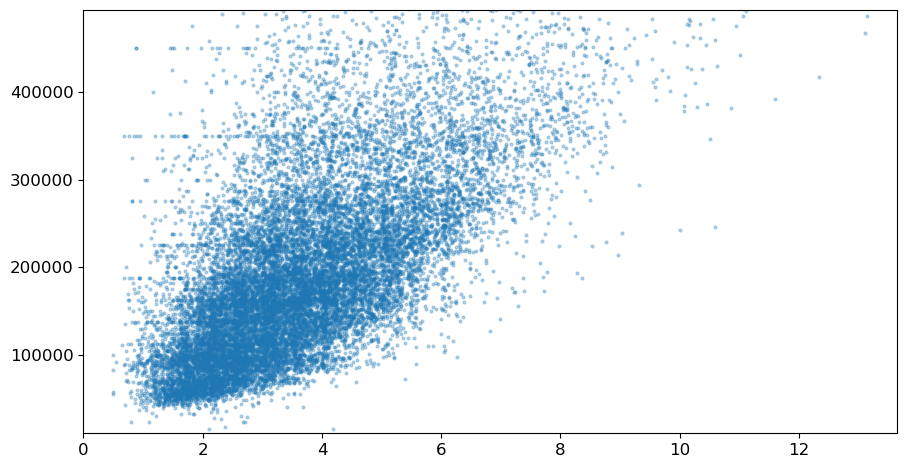

In [64]:
fig, ax = plt.subplots(1,1,figsize=(10.5,5.5))
import matplotlib.colors as mcolors
tblue = mcolors.TABLEAU_COLORS['tab:blue']
tred = mcolors.TABLEAU_COLORS['tab:red']

X,y = sensible_df[['median_income']], sensible_df['median_house_value']
xmin,xmax = X.min(),X.max()
xmin,xmax = xmin.values[0],xmax.values[0]
ymin,ymax = y.min(),y.max()

# Scatterplot the actual test points.  Small size, low alpha.
ax.scatter(X,y,s=4,color = tblue,alpha=.3)

## Choose plot boundaries, cropping off the points at the artificial max
xdelta,ydelta = .5,5_000
plt.axis([xmin-xdelta, xmax+xdelta, ymin-ydelta, ymax-ydelta])
plt.show()

But note if there is a third data dimension of the appropriate sort, data that looks like this
in one projection may look linear in others.  So we need to a do a **complete** analysis,
looking at all variable pairings to even make a first guess.  And even that won't always work
(if the hyperplane that describes the linearity has too many dimensions).  The plot in the next
section tries to help you visualize this.

Of course some data **are** nonlinear, and this data may be an example.  

But there's another question looming. Perhaps the variables we have in hand just collectively don't contain enough information to do good regression.  In that case we either get more information, or we have to be content with low R2-values.

So we have 3 explanations for poor results in our linear regression, which are not mutually exclusive.

1. The only true model is non linear
2. The problem requires us to use more variables in our data get good results.
3. The phenomenon we are studying is influenced by variables outside our data set.

We might break out a subcase of 3, since it really merits special treatment:  There is noise in
our data.  Noise is different because it may affect each variable in different ways, and needs to be modeled that way.

### Linearity in higher dimensions:   Was our data linear?

Many of you took one look at the cloud of points above and immediately concluded the porblem
was non linear.

When we look at a projection of linear data onto a lower number of dimensions,
we can completely miss the linear structure.  The plot on the left shows that the X,Y,Z points lie on a plane.  The plot on the right is a projection of 250 randomly selected points from that plane
on to the XZ plane.   The linear structure is gone. 

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


#ax + by + cz + d = 0
# z = -a/c x -b/c y - d
# Trythis form
# z = ax + b y + c
# z = x + y + c (a=1,b=1,c=intercept)

a,b,c = 1,1,-3
def f(x,y):
    return a*x + b*y + c

x = np.linspace(0,3)
y = np.linspace(0,3)
X,Y = np.meshgrid(x,y)
Z = f(X, Y)
d1,d2 = Z.shape
mu, sigma = 0, 0.1 # mean and standard deviation
# Add some noise to z
s = np.random.normal(mu, sigma, x.shape[0]**2).reshape((d1,d2))
Z = Z + s

In [91]:
x.shape

(50,)

In [94]:
Z.min(),Z.max()

(-3.0390466285840207, 2.9582118326687876)

Draw a plot:

ax0.azim=-20
ax0.elev=-180


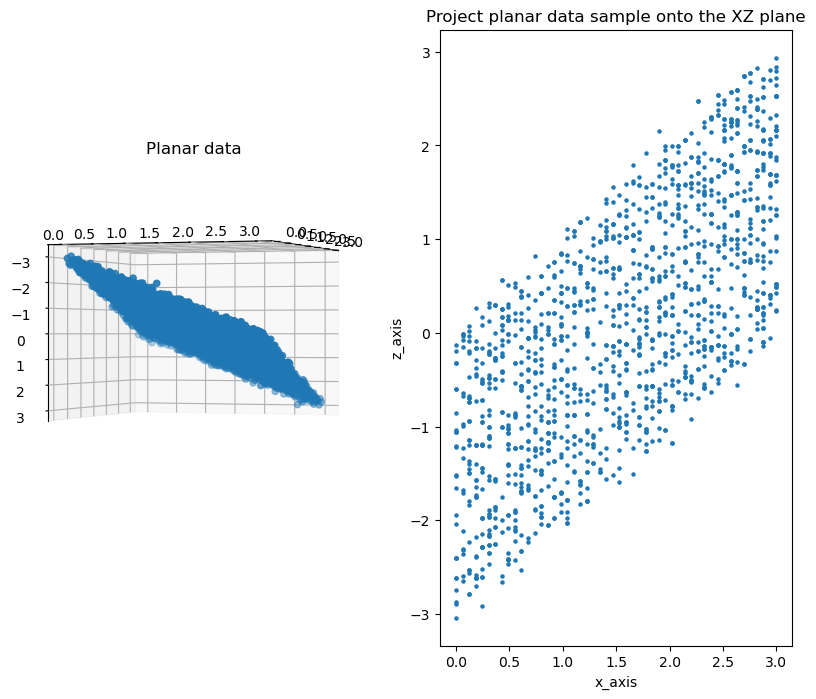

In [95]:
fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122)


ax0.scatter(X, Y, Z,)
ax0.view_init(-180, -20)  # From ??
ax0.set_title("Planar data")

# Plot projection of plane onto XZ plane
XX,YY, ZZ = X.ravel(),Y.ravel(), Z.ravel()
indices = np.array([random.randint(0,2499) for i in range(1500)])
xp,yp, zp = XX[indices], YY[indices], ZZ[indices]
ax1.scatter(xp,zp,s=5)
ax1.set_ylabel('z_axis')
ax1.set_xlabel('x_axis')
print(f'{ax0.azim=}')
print(f'{ax0.elev=}')
T = ax1.set_title("Project planar data sample onto the XZ plane")

But in fact linear regression will work perfectly.

Put the randomly sampled data into 2D array form.

In [96]:
#data = np.concatenate([XX[:,np.newaxis],YY[:,np.newaxis]],axis=1)
X_train = np.concatenate([xp[:,np.newaxis],yp[:,np.newaxis]],axis=1)
z_train = zp

In [97]:
## Take another sample for test data
test_indices = np.array([random.randint(0,2499) for i in range(250)])
xp0,yp0,z_test = XX[test_indices], YY[test_indices], ZZ[test_indices]
X_test = np.concatenate([xp0[:,np.newaxis],yp0[:,np.newaxis]],axis=1)

In [98]:
lin1 = linear_model.LinearRegression()
lin1.fit(X_train,z_train)

LinearRegression()

In [99]:
predictions = lin1.predict(X_test)

In [100]:
r2_score(z_test,predictions,),mean_squared_error(z_test,predictions,)

(0.9932841516999961, 0.011085805929015865)

In [101]:

residuals = (z_test - predictions)
residuals[:10]

array([-0.02402549,  0.10394616,  0.15785866,  0.03796992,  0.0181179 ,
       -0.01359771,  0.25645632,  0.06764667,  0.01359388, -0.14496937])

So what we've demonstrated with toy data is that a sample of perfectly linear data can look nonlinear if we
only look at a projection (2 of the 3 dimensions).  And that linear regression can work fine on data like
this (because it **is** linear, the equation generating it is the equation of a plane).  The R2 is a perfect
1.0.  And the MSE is practically undetectable.

Of course real data is never this perfectly linear; there is usually
noise, we won't usually have our hands on all the relevant variables. So these results are a little 
fantasy like.

But the take away here is the visual.  The randomly sampled data is only **approximately** linear.
Because of the noise we added, it does not meet the mathematical ideal of linearity.    
Nevertheles, the regression algorithm, constrained to find a linear
predictor, found the exact parameters we  used to generate the data:

In [102]:
print(a,b,c)
print(f"{lin1.coef_[0]:.1f} {lin1.coef_[1]:.1f} {lin1.intercept_:.1f}")

1 1 -3
1.0 1.0 -3.0


And it still looks like a mess as a projection.

In [103]:
df0 = pd.DataFrame(X_train,columns=['x','y'])
df0['z'] = z_train

Checking that the alignment of the sample is not perfect (the noise guarntees that)

In [104]:
z = a*df0['x'] + b*df0['y'] + c
(z ==  df0["z"]).all()

False

And showing what an imperfect tool correlation can be for exposing linearity: `x` and `y` both have strong
but imperfect correlations to `z` (note the same x-value can correspond to multiple z-values, so the correlation can't be perfect).

In [77]:
df0.corr()

,x,y,z
x,1.000000,-0.010543,0.694137
y,-0.010543,1.000000,0.707670
z,0.694137,0.707670,1.000000


# Exercises

We'll use one of the standard data sets in R, the "Prestige" data.

In [106]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Where the data is if you follow the directory structure on githyb
#url = "https://github.com/gawron/python-for-social-science/blob/master/visualization/data/Prestige.csv"
# Where you have to look to download it directly.  The server address changes, also the "blob" goes away.
url = "https://raw.githubusercontent.com/gawron/python-for-social-science/master/visualization/data/Prestige.csv"
#df = pd.read_csv("data/Prestige.csv",header=0,index_col=0)
df = pd.read_csv(url,header=0,index_col=0)
df

,education,income,women,prestige,census,type
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
...,...,...,...,...,...,...
bus.drivers,7.58,5562,9.47,35.9,9171,bc
taxi.drivers,7.93,4224,3.59,25.1,9173,bc
longshoremen,8.37,4753,0.00,26.1,9313,bc
typesetters,10.00,6462,13.58,42.2,9511,bc


To predict

In [107]:
df["prestige"]

gov.administrators     68.8
general.managers       69.1
accountants            63.4
purchasing.officers    56.8
chemists               73.5
                       ... 
bus.drivers            35.9
taxi.drivers           25.1
longshoremen           26.1
typesetters            42.2
bookbinders            35.2
Name: prestige, Length: 102, dtype: float64

#### A good predictor

In [108]:
new_col = np.log(df['income'])
new_col.name="log_income"
df0 = pd.DataFrame([df["income"],new_col]).T
df0.describe()

,income,log_income
count,102.000000,102.000000
mean,6797.901961,8.660508
std,4245.922227,0.591449
min,611.000000,6.415097
25%,4106.000000,8.320120
50%,5930.500000,8.687852
75%,8187.250000,9.010325
max,25879.000000,10.161187


#### Log(income col) + education +women

We'll use three columns for our regression.  One of which is created by a log transformation.  We apply log
to the income column to reduce its skewness.  To understand this, note how, in the income column, the distance between the 25-percentile point and 50-percentile point is much smaller than the distance between the 50-percentile point and the 75-percentile point. 

In [109]:
df.describe()['income']

count      102.000000
mean      6797.901961
std       4245.922227
min        611.000000
25%       4106.000000
50%       5930.500000
75%       8187.250000
max      25879.000000
Name: income, dtype: float64

In [110]:
def make_model(X,y, random_state=1,do_split=True):
    lin1 = linear_model.LinearRegression()
    if do_split:
        X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state)
    else:
        X_train, X_test, y_train, y_test = X,X,y,y
    lin1.fit(X_train,y_train)
    predictions = lin1.predict(X_test)
    return lin1, X_test, y_test, predictions 

def get_residuals (y_test, predictions):
    residuals = (y_test - predictions)
    return residuals

def adj_r2 (r2, n, p):
    return 1-((1-r2)*(n-1)/(n-p))
    
df["log_income"] = np.log(df["income"])


#ind_vars= ['education']
# This time using log_income improves the model
ind_vars = ['education',"log_income","women"]
#ind_vars = ['education',"income","women"]
#ind_vars = ['education',"log_income","women","census"]
p = len(ind_vars)

X, y = df[ind_vars], df["prestige"]
lin1, X_test, y_test, predictions  = make_model(X,y,random_state=42,do_split=False)
residuals = get_residuals (y_test, predictions)
N = len(y_test)

In [111]:
residuals[:5]

gov.administrators     3.727401
general.managers      -2.407019
accountants            3.237568
purchasing.officers    2.584560
chemists               7.945657
Name: prestige, dtype: float64

In [112]:
# education 
# 'education',"log_income","women" (-0.10101829222855763, 19.17933592185765, -17.36391398507096)
residuals.median(), residuals.max(), residuals.min()

(-0.10101829222855763, 19.17933592185765, -17.36391398507096)

In [113]:
residuals.quantile(.25)

-4.429343898148138

In [114]:
residuals.quantile(.75)

4.316042526579618

In [115]:
# education: (array([5.36087773]), -10.731981967960806)
# 'education',"log_income","women"
#(array([ 3.73050783, 13.43822306,  0.04689514]), -110.96582408762598)
lin1.coef_,lin1.intercept_

(array([ 3.73050783, 13.43822306,  0.04689514]), -110.96582408762598)

In [116]:
# education: 9.103290684137031 (agrees with R when ddof=2)
# 'education',"log_income","women" 6.952137048966496
residuals.std()

6.986468798742807

In [117]:
# education: Agrees with R
# 'education',"log_income","women" 0.8351 0.8318
r2 = r2_score(y_test,predictions)
ar2 = adj_r2(r2,N,p)
print(r2,ar2)

0.8350956676810606 0.8317642670281526


###  Add 1 hot encoding of symbolic column and census +  Factor code blocks into functions

In [118]:
df["type"].unique()

array(['prof', 'bc', 'wc', nan], dtype=object)

The code you write should add 3 new columns to `df`,
with $\lbrace0,\,1\rbrace$-values, one-hot encoideing the "type"
of each row.

In [119]:
types_cols

NameError: name 'types_cols' is not defined

1.  Add the one-hot encoding columns `types_cols` (as defined in above)
    to `df` (with the appropriate values.  An example of how to do one-hot-encoding
    of a symbolic column is given earlier in the notebook).
2.  In a new code cell below, copy and paste the code from the previous section which computes the models 
    and some additional variables:

    ```python
    ind_vars = ["education","log_income","women"]
    p = len(ind_vars)

    X, y = df[ind_vars], df["prestige"]
    lin1, X_test, y_test, predictions  = make_model(X,y,random_state=42,do_split=False)
    residuals = get_residuals (y_test, predictions)
    N = len(y_test)
    ```
    
    Modify it to use the additional `types_cols` as additional variables in the regression.
    
3.  Write a function `report`  that is called as follows:

    ```python
    report(residuals,lin1,y_test,predictions,N,p,X_test.columns.tolist())
    ```
    
    and prints out
    
    ```python
    Residuals: Mdn 0.352, Min -13.714, Max 17.511 Q1 -4.244 Q3 4.089
    Coef: [ 2.87728231e+00  1.49064313e+01  9.35572908e-02  8.02557096e-04
     -2.17479723e+00 -2.17479723e+00 -2.17479723e+00 -2.17479723e+00
     -2.17479723e+00 -1.89036705e-01 -1.89036705e-01 -1.89036705e-01
     -1.89036705e-01 -1.89036705e-01 -2.25123740e+00 -2.25123740e+00
     -2.25123740e+00 -2.25123740e+00 -2.25123740e+00], 
    Intcpt: -112.691
    Max col log_income   Min col wc        
    R2: 0.869   Adj R2 0.861
    ```
    
    Here "Mdn" labels the median value of the residuals, Q1 and Q3 label
    the residual values at the 25th and 75th percentiles (computed in the previous
    section using `.quantile(  )`), the coefficients and the intercept of the model,
    and the R2 and adjusted R2 values.  Many of these are computed in the previous section;
    `report` should also find the names of the columns with the maximum and minimum coefficient
    values.  Some of the variables needed for the call to `report` are already computed in the code 
    you copied and pasted from the previous section.  Add the line calling the new function report 
    to the code cell you modified in Step2.  Execute and test your new code.


In [138]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
## Fill out
types_cols2 = ohe.fit_transform(df[['type']])
types_cols2.toarray()[:5]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [137]:
len(df),len(new_df)

(102, 102)

In [136]:
types_cols = df['type'].str.get_dummies()
# Add cols
new_df = pd.concat([df,types_cols],axis=1)
new_df

,education,income,women,prestige,census,type,log_income,bc,prof,wc
gov.administrators,13.11,12351,11.16,68.8,1113,prof,9.421492,0,1,0
general.managers,12.26,25879,4.02,69.1,1130,prof,10.161187,0,1,0
accountants,12.77,9271,15.70,63.4,1171,prof,9.134647,0,1,0
purchasing.officers,11.42,8865,9.11,56.8,1175,prof,9.089866,0,1,0
chemists,14.62,8403,11.68,73.5,2111,prof,9.036344,0,1,0
...,...,...,...,...,...,...,...,...,...,...
bus.drivers,7.58,5562,9.47,35.9,9171,bc,8.623713,1,0,0
taxi.drivers,7.93,4224,3.59,25.1,9173,bc,8.348538,1,0,0
longshoremen,8.37,4753,0.00,26.1,9313,bc,8.466531,1,0,0
typesetters,10.00,6462,13.58,42.2,9511,bc,8.773694,1,0,0


In [371]:
df["log_income"] = np.log(df["income"])
ind_vars = ['education',"log_income","women","census"]
#ind_vars = ['education',"log_income","women"]
#ind_vars= ['education']
one_hot_encodings = df['type'].str.get_dummies()
types_cols = one_hot_encodings.columns.tolist()

ind_vars = ind_vars + types_cols
p = len(ind_vars)

df = pd.concat([df,one_hot_encodings],axis=1)
X, y = df[ind_vars], df["prestige"]
lin1, X_test, y_test, predictions  = make_model(X,y,random_state=42,do_split=False)
residuals = get_residuals (y_test, predictions)
N = len(X_test)

In [372]:
def report(residuals,lin1,y_test,predictions, N,p, cols):
    Q1_val,Q3_val = residuals.quantile(.25),residuals.quantile(.75)
    print(f"\nResiduals: Mdn {residuals.median():.3f}, Min {residuals.min():.3f}"
          f" Max {residuals.max():.3f} Q1 {Q1_val:.3f} Q3 {Q3_val:.3f}")
    print(f"Coef: {lin1.coef_}, ")
    print(f"Intcpt: {lin1.intercept_:.3f}")
    max_col, min_col = lin1.coef_.argmax(),(lin1.coef_).argmin()
    print(f"Max col {cols[max_col]:<10}   Min col {cols[min_col]:<10}")
    r2 = r2_score(y_test,predictions)
    ar2 = adj_r2(r2,N,p)
    print(f"R2: {r2:.3f}   Adj R2 {ar2:.3f}\n")
    
report(residuals,lin1,y_test,predictions,N,p,X_test.columns.tolist())


Residuals: Mdn 0.352, Min -13.714, Max 17.511 Q1 -4.244 Q3 4.089
Coef: [ 2.87728231e+00  1.49064313e+01  9.35572908e-02  8.02557096e-04
 -2.17479723e+00 -2.17479723e+00 -2.17479723e+00 -2.17479723e+00
 -2.17479723e+00 -1.89036705e-01 -1.89036705e-01 -1.89036705e-01
 -1.89036705e-01 -1.89036705e-01 -2.25123740e+00 -2.25123740e+00
 -2.25123740e+00 -2.25123740e+00 -2.25123740e+00], 
Intcpt: -112.691
Max col log_income   Min col wc        
R2: 0.869   Adj R2 0.861



##  Official Notebook material ends here

####  The form of a square root of 0

Rows and cols must be orthogonal, leading to the following:

$$
\left \lbrack
\begin{array}{cc}
x   & sx\\
-s^{-1}x  & -x
\end{array}
\right \rbrack
$$

In [4]:
import numpy as np


def minus_inv (w):
    return -1/w

x,s = 3,.2

O = np.array([[x,s*x],[minus_inv(s)*x,-x]])
print(O)
print(O@O)
print()

x,s = 1,4

O = np.array([[x,s*x],[minus_inv(s)*x,-x]])
print(O)
print(O@O)

[[  3.    0.6]
 [-15.   -3. ]]
[[-1.77635684e-15  0.00000000e+00]
 [ 0.00000000e+00 -1.77635684e-15]]

[[ 1.    4.  ]
 [-0.25 -1.  ]]
[[0. 0.]
 [0. 0.]]


Also note: `Ov` is an eigenvector of `O` with eigenvalue 0.

In [8]:
v = np.array([5,7])
O@(O@v)

array([0., 0.])

So `O` maps all vectors to the same line.

In [10]:
v1 = np.array([5,7])
v2 = np.array([3,2])
print(O@v1)
print(O@v2,3*O@v2)

[33.   -8.25]
[11.   -2.75] [33.   -8.25]


In [5]:
v = np.array([5,7])
L = np.array([[1,2],[-1,-2]])
L@v

array([ 19, -19])